## Preparation

### Install packages

Make sure you have installed required python packages:

| package |
| -- |
| towhee |
| towhee.models |
| pillow |
| ipython |
| captum |
| matplotlib |

In [1]:
! python -m pip install -q towhee towhee.models pillow ipython captum matplotlib

## 1.Interpret CNN using attribution-based method.
The attribution-based approach is a series of classical algorithms for interpreting neural network models. Towhee integrate and provide many attribution-based algorithms show in [captum](https://captum.ai/), such as Occlusion, GradientShap, Saliency and so on.

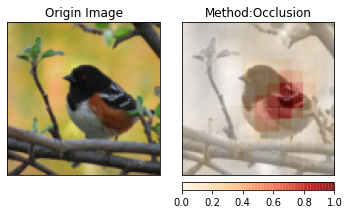

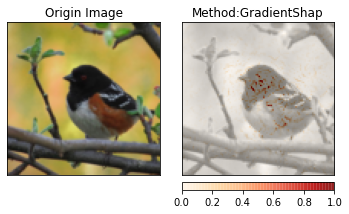

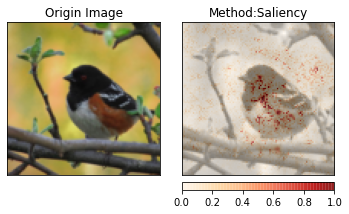

It is brambling, fringilla montifringilla.
probability = 0.9565147757530212


In [2]:
import towhee
from PIL import Image
import numpy as np
from towhee.trainer.utils.plot_utils import interpret_image_classification
from torchvision.models import resnet18
from torchvision import transforms
import os
from cls2idx import CLS2IDX
import warnings
warnings.filterwarnings("ignore")

model = resnet18(pretrained=True)
img1 = Image.open('./towhee1.png').convert('RGB')
val_transform = transforms.Compose([
    transforms.Resize(100),
    transforms.CenterCrop(100),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
prediction_score, pred_label_idx = interpret_image_classification(model.to('cpu'), img1, val_transform, "Occlusion",
                                                                  fig_size=(5, 5))
interpret_image_classification(model.to('cpu'), img1, val_transform, "GradientShap", fig_size=(5, 5))
interpret_image_classification(model.to('cpu'), img1, val_transform, "Saliency", fig_size=(5, 5))
print('It is {}.'.format(CLS2IDX[pred_label_idx].lower()))
print('probability = {}'.format(prediction_score))

Although the algorithms vary, they basically attribute the pixel regions that are critical to image classification to the bird's body.

## 2.Show heatmap for transformed-based model.
Recently, with the rapid development of the transformer structure in the field of computer vision, explaining the transformer-based model is also an importance task. Many algorithms, such as [transformer_attribution](https://arxiv.org/abs/2012.09838) or [rollout](https://arxiv.org/abs/2005.00928), are designed for transformer models.
Here are heatmap visualization examples for two important transformer-based model in computer vision, one is [Vision Transformers](https://arxiv.org/abs/2010.11929), the other is [Multiscale Vision Transformers](https://arxiv.org/abs/2104.11227).

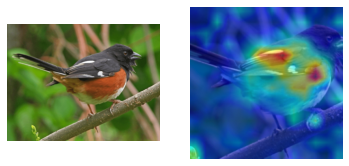

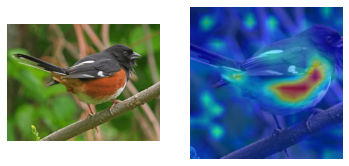

In [3]:
from towhee.models.visualization.transformer_visualization import show_image_heatmap
from towhee.models import vit

vit_model = vit.create_model(model_name="vit_base_16x224", pretrained=True)
img2 = Image.open('./towhee2.png').convert('RGB')

show_image_heatmap(vit_model, img2, method='transformer_attribution')
show_image_heatmap(vit_model, img2, method='rollout')

As we can see, the wings play a key role in classification for this image.

Now let's try MViT model, and we should download the weights manually.

In [4]:
! curl -L https://github.com/towhee-io/examples/releases/download/data/IN1K_MVIT_B_16_CONV.pyth -O

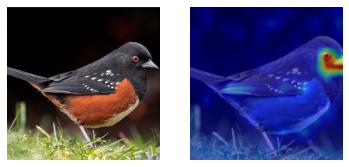

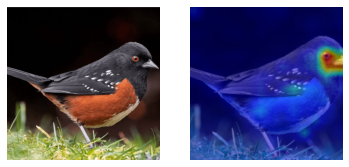

In [5]:
from towhee.models.multiscale_vision_transformers import create_mvit_model

mvit_model = create_mvit_model("imagenet_b_16_conv",
                               checkpoint_path='./IN1K_MVIT_B_16_CONV.pyth')
img3 = Image.open('./towhee3.png').convert('RGB')

show_image_heatmap(mvit_model, img3, method='transformer_attribution')
show_image_heatmap(mvit_model, img3, method='rollout')

For this image, the eyes and mouth play the most decisive role in the classification.

## 3.Interpret and visualize CLIP model for cross-modal data.
[CLIP](https://openai.com/blog/clip/) is a multimodal model that combines knowledge of language concepts with semantic knowledge of images. It  is a gigantic leap forward, bringing many of the recent developments from the realm of natural language processing into the mainstream of computer vision. General speaking, given an image-text pair, the model can determine the similarity of match between these two different modal data.
We can use towhee's visualization tools to interpret the CLIP model to find image regions or text fragments that play a key role in the model's output, which helps us better understand this model.

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,a dog


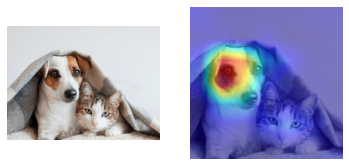

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,a cat


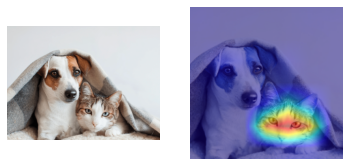

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,0 (0.00),0,0.00,the blanket on top


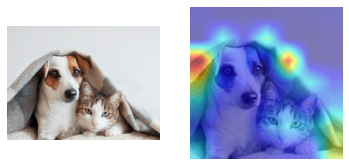

In [6]:
from towhee.models.visualization.clip_visualization import show_attention_for_clip
from towhee.models.clip import clip

cat_dog_img = Image.open('./cat_and_dog.png').convert('RGB')
model = clip.create_model(
    model_name="clip_vit_b32",
    pretrained=True,
    device="cpu",
    jit=False,
    vis=True
)
text_list = ['a dog', 'a cat', 'The blanket on top']
show_attention_for_clip(model, cat_dog_img, text_list, device='cpu')

It can be seen that when our text is describing an animal in this image, the information of this animal plays a key role in the model inference.
When describing 'the blanket on top', the model placed the most emphasis on 'blanket', followed by 'on top', and also correctly find the area of the blanket in the image and ignore the animals. It's amazing.

## 4.Visualization for embeddings.
For deep learning, the inside of the model is usually not visible, while visualization of embedding helps us to see what the output of each step inside the model looks like. Towhee provides such a tool. With an EmbeddingExtractor, the embedding to be queried is extracted and then visualized.

['',
 'conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1',
 'layer1.0',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.1',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer2',
 'layer2.0',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.1',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer3',
 'layer3.0',
 'layer3.0.conv1',
 'layer3.0.bn1',
 'layer3.0.relu',
 'layer3.0.conv2',
 'layer3.0.bn2',
 'layer3.0.downsample',
 'layer3.0.downsample.0',
 'layer3.0.downsample.1',
 'layer3.1',
 'layer3.1.conv1',
 'layer3.1.bn1',
 'layer3.1.relu',
 'layer3.1.conv2',
 'layer3.1.bn2',
 'layer4',
 'layer4.0',
 'layer4.0.conv1',
 'layer4.0.bn1',
 'layer4.0.relu',
 'layer4.0.conv2',
 'layer4.0.bn2',
 'layer4.0.downsample',
 'layer4.0.down

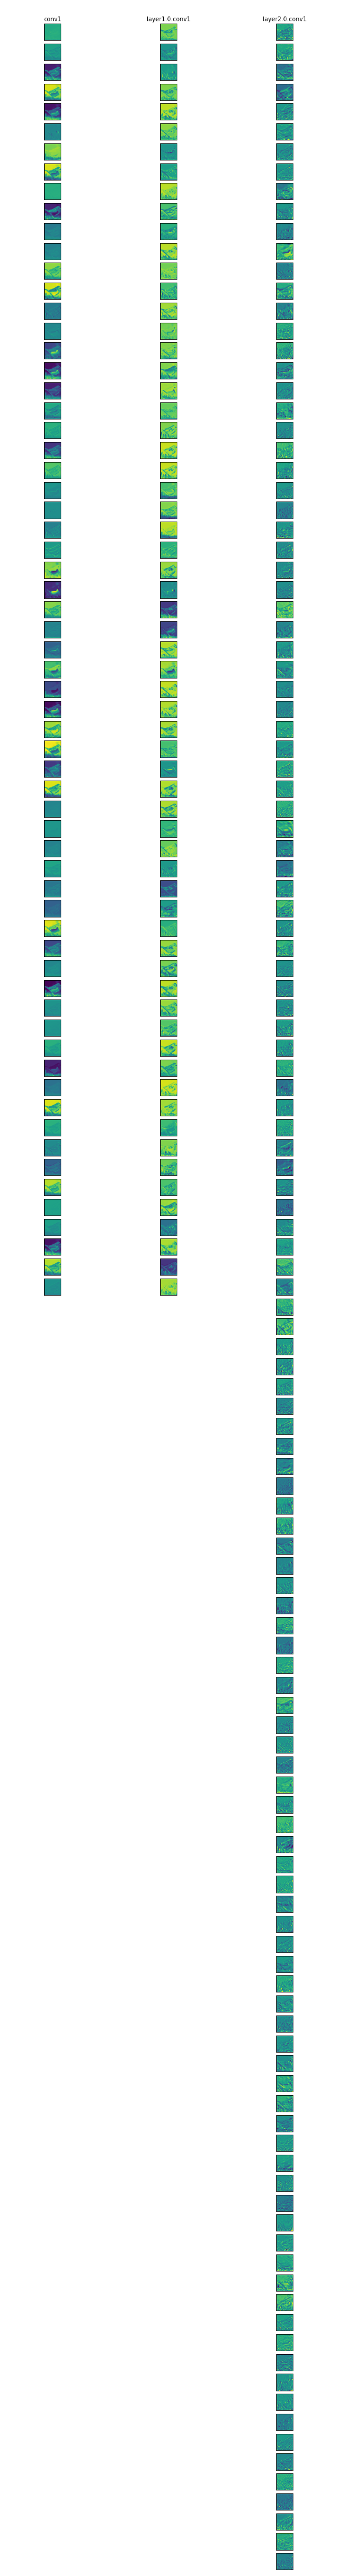

torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 56, 56])
torch.Size([1, 128, 28, 28])


In [7]:
from towhee.models.embedding.embedding_extractor import EmbeddingExtractor
from towhee.models.visualization.embedding_visualization import show_embeddings

model = resnet18(pretrained=True)
device = 'cpu'
model = model.to(device)
emb_extractor = EmbeddingExtractor(model)
# emb_extractor.disp_modules(full=True)
emb_extractor.disp_modules(full=False)
layer_name_list = ['conv1',
                   'layer1.0.conv1',
                   'layer2.0.conv1',
                   ]
for layer_name in layer_name_list:
    emb_extractor.register(layer_name)
image = Image.open('./towhee3.png').convert('RGB')
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
img = transform(image).unsqueeze(dim=0).to(device)
model(img)
show_embeddings(emb_extractor.emb_out.embeddings, figsize=(10, 80), emb_name_list=layer_name_list)
for emb in emb_extractor.emb_out.embeddings:
    print(emb.shape)